In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
econ_data = pd.read_csv('C:\\Users\\cocob\\Downloads\\all_currencies.csv')
econ_data.set_index(econ_data['Date'], inplace=True)
del econ_data['Date']

#Annualize our unemployment delta by multiplying by 4 (a crude but sufficient method for here)
#econ_data['Unemployment_chg'] = econ_data.Unemployment.diff()*4
econ_data.dropna(inplace=True)

econ_data.head()

,Unnamed: 0,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2015-12-11,29,$$$,0.000050,0.000050,0.000022,0.000027,1.0,2287.0
2015-12-12,30,$$$,0.000027,0.000044,0.000021,0.000043,0.0,1245.0
2015-12-13,31,$$$,0.000043,0.000044,0.000022,0.000022,2.0,1996.0
2015-12-14,32,$$$,0.000022,0.000022,0.000022,0.000022,3.0,994.0
2015-12-15,33,$$$,0.000022,0.000023,0.000022,0.000023,2.0,1018.0


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = pd.DataFrame(econ_data.Open)
y = list(econ_data.Close)

lm.fit(X,y)
print('coefficients: ' + str(lm.coef_))
print('intercept: ' + str(lm.intercept_))
print('score: ' + str(lm.score(X,y)))

coefficients: [0.91381705]
intercept: 12.902455230163582
score: 0.8634542308079898


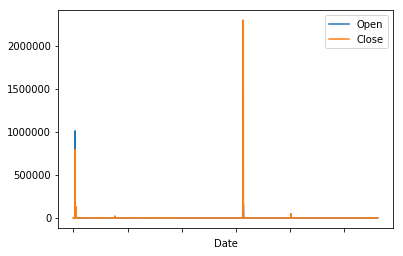

In [10]:
econ_data[['Open', 'Close']].plot()
plt.show()

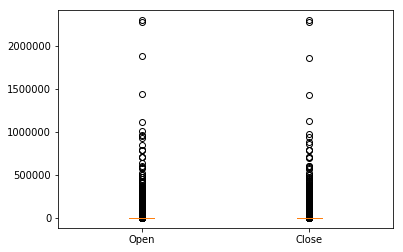

In [12]:
plt.boxplot([econ_data.Open, econ_data.Close])
plt.xticks([1,2], ['Open','Close'])
plt.show()

In [13]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor()

hr.fit(X,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(X,y)))

coefficients: [0.97885912]
intercept: 0.0001566002129340944
score: 0.8590798854130958


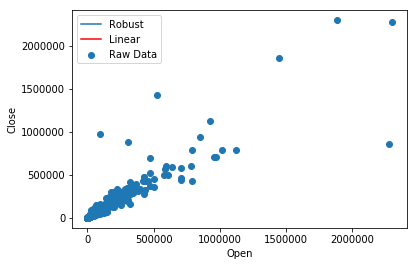

In [14]:
robust = [hr.coef_[0] * i + hr.intercept_ for i in range(-6, 10)]
linear = [lm.coef_[0] * i + lm.intercept_ for i in range(-6, 10)]

plt.scatter(x = econ_data.Open, y = econ_data.Close, label='Raw Data')
plt.plot(range(-6,10), robust, label='Robust')
plt.plot(range(-6,10), linear, 'r', label='Linear')
plt.legend()
#plt.title('Economic Growth vs Unemployment Rate Change')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

Upon examination for the information above, openning and closing values of cryptocurrenies are correlated. The coefficient of 0.9789 indicates openning and closing prices relate to one another. For the most part, Close prices increased or decreased in relation to the Open prices.